<a href="https://colab.research.google.com/github/oliveira-silva-lucas/primeiro-ml-transfer-learning/blob/main/transfer-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparação entre resultado de dois modelos.

Um modelo sendo treinando do zero e o outro tendo transferencia de aprendizado.

In [83]:
%matplotlib inline

import os

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

Base de treinamento em: https://github.com/oliveira-silva-lucas/primeiro-ml-transfer-learning/tree/main/imagens

Foram utilizadas cerca de 500 imagens de gatos e cachorros da base : https://www.microsoft.com/en-us/download/details.aspx?id=54765



In [41]:
#Carregar diretorios com as imagens para treinamento
root = './imagens/base-treinamento'
exclude = ['.ipynb_checkpoints']
train_split, val_split = 0.7, 0.15

categories = [x[0] for x in os.walk(root) if x[0]][1:]
categories = [c for c in categories if c not in [os.path.join(root, e) for e in exclude]]

print(categories)


['./imagens/base-treinamento/gato', './imagens/base-treinamento/cachorro', './imagens/base-treinamento/lobo-guara', './imagens/base-treinamento/jaguatirica']


In [42]:
# Carregar imagens e criar o dataset com as imagens dimensionadas
def get_image(path):
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

data = []
for c, category in enumerate(categories):
    print(c, category)
    images = [os.path.join(dp, f) for dp, dn, filenames
              in os.walk(category) for f in filenames
              if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
    print(images[:3])
    for img_path in images:
        img, x = get_image(img_path)
        data.append({'x':np.array(x[0]), 'y':c})

num_classes = len(categories)

0 ./imagens/base-treinamento/gato
['./imagens/base-treinamento/gato/545.jpg', './imagens/base-treinamento/gato/470.jpg', './imagens/base-treinamento/gato/30.jpg']
1 ./imagens/base-treinamento/cachorro
['./imagens/base-treinamento/cachorro/545.jpg', './imagens/base-treinamento/cachorro/470.jpg', './imagens/base-treinamento/cachorro/30.jpg']
2 ./imagens/base-treinamento/lobo-guara
['./imagens/base-treinamento/lobo-guara/image_162.jpg', './imagens/base-treinamento/lobo-guara/image_281.jpg', './imagens/base-treinamento/lobo-guara/image_32.jpg']
3 ./imagens/base-treinamento/jaguatirica
['./imagens/base-treinamento/jaguatirica/image_162.jpg', './imagens/base-treinamento/jaguatirica/image_281.jpg', './imagens/base-treinamento/jaguatirica/image_32.jpg']


In [60]:
#Embaralhar o conteúdo
random.shuffle(data)

In [44]:
#Criar treinamento
idx_val = int(train_split * len(data))
idx_test = int((train_split + val_split) * len(data))
train = data[:idx_val]
val = data[idx_val:idx_test]
test = data[idx_test:]

In [45]:
#Separar por 'tipo' (cachorro, gato, jaguatirica, lobo-guara)
x_train, y_train = np.array([t["x"] for t in train]), [t["y"] for t in train]
x_val, y_val = np.array([t["x"] for t in val]), [t["y"] for t in val]
x_test, y_test = np.array([t["x"] for t in test]), [t["y"] for t in test]
print(y_test)

[1, 2, 1, 0, 0, 3, 3, 3, 0, 2, 0, 2, 2, 3, 1, 0, 2, 3, 1, 1, 2, 2, 1, 2, 3, 3, 1, 3, 0, 0, 3, 0, 3, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0, 3, 0, 3, 2, 1, 0, 2, 3, 3, 3, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 3, 1, 0, 2, 2, 0, 0, 0, 0, 2, 3, 1, 2, 1, 1, 1, 0, 2, 3, 3, 3, 1, 0, 1, 2, 3, 3, 1, 0, 3, 1, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 0, 2, 0, 3, 2, 0, 0, 0, 1, 2, 0, 3, 1, 1, 1, 1, 0, 3, 3, 1, 0, 1, 1, 1, 2, 1, 3, 2, 1, 2, 3, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 0, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 3, 1, 3, 1, 3, 2, 1, 2, 0, 3, 2, 1, 1, 1, 0, 1, 0, 3, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 3, 2, 3, 1, 0, 2, 3, 3, 0, 3, 3, 3, 0, 3, 0, 1, 3, 3, 0, 1, 3, 3, 1, 2, 3, 1, 1, 1, 0, 0, 1, 1, 0]


In [46]:
# normalizar data
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_test.shape)

(264, 4)


In [47]:
# resumo
print("finished loading %d images from %d categories"%(len(data), num_classes))
print("train / validation / test split: %d, %d, %d"%(len(x_train), len(x_val), len(x_test)))
print("training data shape: ", x_train.shape)
print("training labels shape: ", y_train.shape)

finished loading 1757 images from 4 categories
train / validation / test split: 1229, 264, 264
training data shape:  (1229, 224, 224, 3)
training labels shape:  (1229, 4)


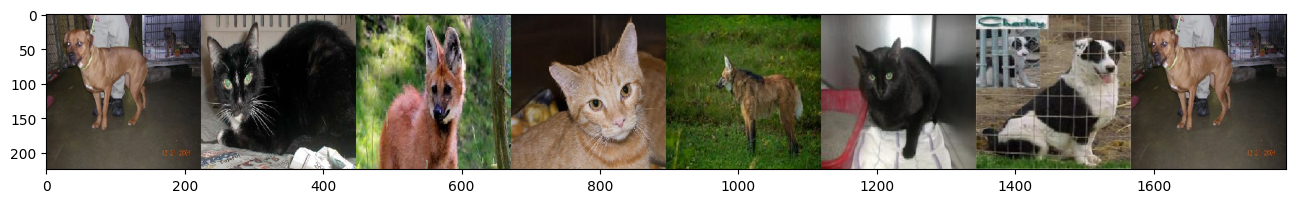

In [48]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(root) for f in filenames if os.path.splitext(f)[1].lower() in ['.jpg','.png','.jpeg']]
idx = [int(len(images) * random.random()) for i in range(8)]
imgs = [image.load_img(images[i], target_size=(224, 224)) for i in idx]
concat_image = np.concatenate([np.asarray(img) for img in imgs], axis=1)
plt.figure(figsize=(16,4))
plt.imshow(concat_image)

In [49]:
# criar o modelo de rede
model = Sequential()
print("Input dimensions: ",x_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Input dimensions:  (224, 224, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,572 (4.61 MB)

 Trainable params: 1,209,572 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# modelo para usar a função de perda de entropia cruzada
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 88s 9s/step - accuracy: 0.3060 - loss: 1.3680 - val_accuracy: 0.4242 - val_loss: 1.2928
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 143s 9s/step - accuracy: 0.4592 - loss: 1.2255 - val_accuracy: 0.5379 - val_loss: 1.0674
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 83s 8s/step - accuracy: 0.5163 - loss: 1.0777 - val_accuracy: 0.5833 - val_loss: 0.9623
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 84s 8s/step - accuracy: 0.5856 - loss: 0.9452 - val_accuracy: 0.5795 - val_loss: 0.9403
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 8s/step - accuracy: 0.5771 - loss: 0.9257 - val_accuracy: 0.5152 - val_loss: 0.9247
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 148s 9s/step - accuracy: 0.6112 - loss: 0.8881 - val_accuracy: 0.6326 - val_loss: 0.8785
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 9s/step - accuracy: 0.6217 - loss: 0.8517 - val_accuracy: 0.6326 - val_loss: 0.8579
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 9s/step - accuracy: 0.6326 - loss: 0.8133 - val_accuracy: 0.6061 - val_

{'accuracy': [0.3360455632209778, 0.4556550085544586, 0.524003267288208, 0.5655003786087036, 0.5882831811904907, 0.6110659241676331, 0.6102522611618042, 0.6419853568077087, 0.6647680997848511, 0.6883645057678223], 'loss': [1.353991150856018, 1.194555640220642, 1.0495193004608154, 0.9676893949508667, 0.9077436327934265, 0.8749608397483826, 0.8542288541793823, 0.8069355487823486, 0.7813783288002014, 0.7315658330917358], 'val_accuracy': [0.42424243688583374, 0.5378788113594055, 0.5833333134651184, 0.5795454382896423, 0.5151515007019043, 0.6325757503509521, 0.6325757503509521, 0.6060606241226196, 0.6742424368858337, 0.6628788113594055], 'val_loss': [1.2928036451339722, 1.0673712491989136, 0.9623003602027893, 0.9403436779975891, 0.9246940612792969, 0.878450334072113, 0.8578519821166992, 0.8814489841461182, 0.8018196821212769, 0.7830054759979248]}


(0.0, 1.0)

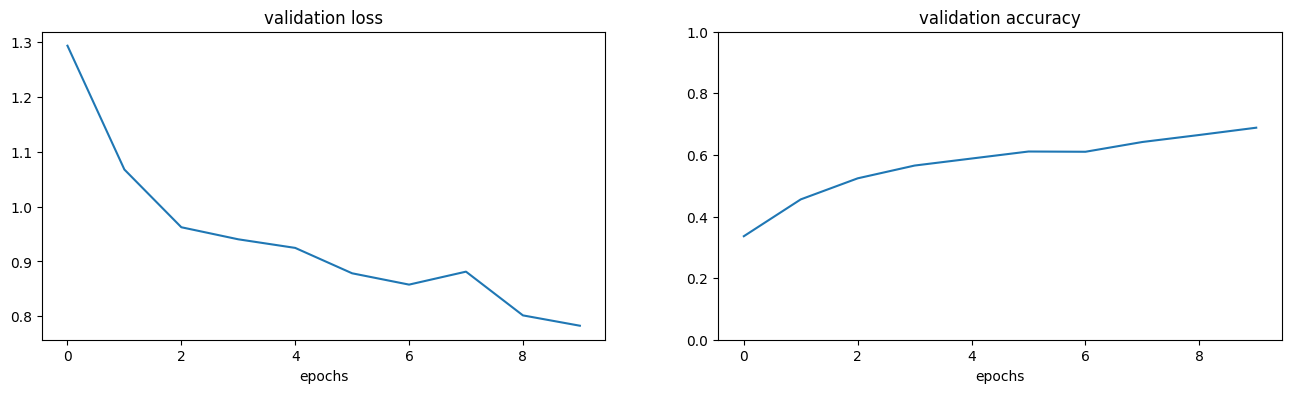

In [53]:
#representação gráfica do resultado
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")
print(history.history)

ax2 = fig.add_subplot(122)
ax2.plot(history.history["accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)


In [54]:
#Total de perda e eficácia
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.78282231092453
Test accuracy: 0.6742424368858337


Agora importando a informação de um modelo treinado "Imagenet"

In [55]:
vgg = keras.applications.VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
# Referencia do modelo VGG16 pré treinado
inp = vgg.input

# criando uma nova camada que usa a função softmax para as categorias cachorro, gato, jaguatirica e lobo-guara
new_classification_layer = Dense(num_classes, activation='softmax')

# conectando a camada com a penúltima da rede treinada
out = new_classification_layer(vgg.layers[-2].output)

# criando o novo modelo usando o modelo treinado com a camada nova adicionada
model_new = Model(inp, out)

In [57]:
# Bloqueando o treinamento das camadas exceto a última
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# certificando que a última camada é treinavel
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │        16,388 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,276,932 (512.23 MB)

 Trainable params: 16,388 (64.02 KB)

 Non-trainable params: 134,260,544 (512.16 MB)

In [58]:
#Treinando o modelo utilizando o transfer-learning
history2 = model_new.fit(x_train, y_train,
                         batch_size=128,
                         epochs=10,
                         validation_data=(x_val, y_val))

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 894s 91s/step - accuracy: 0.2841 - loss: 1.7573 - val_accuracy: 0.3864 - val_loss: 1.2200
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 963s 95s/step - accuracy: 0.4931 - loss: 1.1068 - val_accuracy: 0.6402 - val_loss: 1.0406
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 897s 91s/step - accuracy: 0.6739 - loss: 0.8804 - val_accuracy: 0.8144 - val_loss: 0.6888
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 916s 91s/step - accuracy: 0.8122 - loss: 0.6455 - val_accuracy: 0.8371 - val_loss: 0.5961
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 936s 92s/step - accuracy: 0.8212 - loss: 0.5776 - val_accuracy: 0.8295 - val_loss: 0.5478
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 905s 90s/step - accuracy: 0.8365 - loss: 0.5268 - val_accuracy: 0.8598 - val_loss: 0.4916
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 929s 91s/step - accuracy: 0.8719 - loss: 0.4660 - val_accuracy: 0.8750 - val_loss: 0.4573
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 956s 95s/step - accuracy: 0.8632 - loss: 0.4512 - val_accuracy: 0.

Resultado gráfico comparando o resultado dos dois modelos

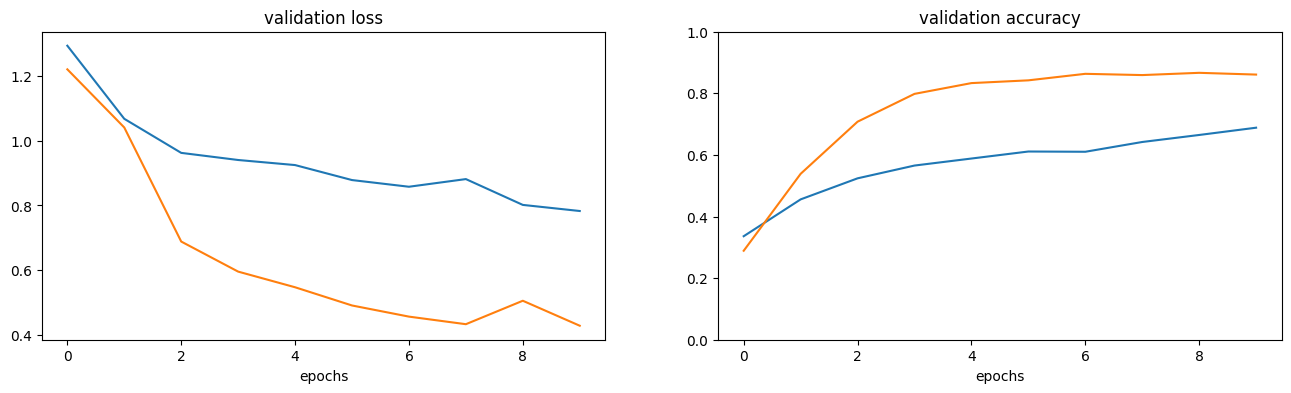

In [61]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["accuracy"])
ax2.plot(history2.history["accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

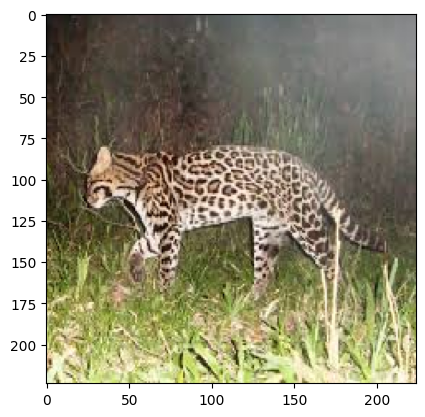

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
transfer-leraning model [[6.2573514e-12 1.0440080e-09 5.1840949e-08 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
NO transfer-learning model [[0. 0. 0. 1.]]


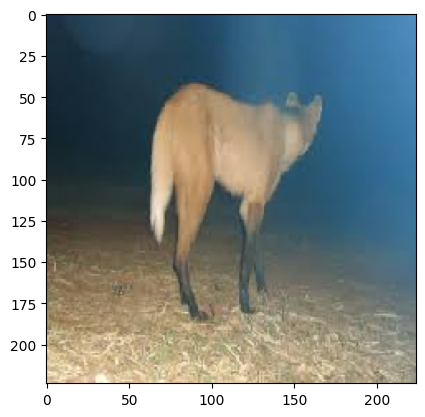

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
transfer-leraning model [[1.06318634e-13 4.14207477e-07 9.99999642e-01 1.38209921e-09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
NO transfer-learning model [[0. 0. 1. 0.]]


In [94]:
img,x = get_image("./imagens/jaguatirica-teste/image_363.jpg")
plt.imshow(img)
plt.show()
print("transfer-leraning model",model_new.predict([x]))
print("NO transfer-learning model",model.predict([x]))

img,x = get_image("./imagens/lobo-guara-teste/image_21.jpg")
plt.imshow(img)
plt.show()
print("transfer-leraning model",model_new.predict([x]))
print("NO transfer-learning model",model.predict([x]))


